# Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.



In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from env import host, user, password
import wrangle
import os

In [2]:
# get Telco Data
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [3]:
def new_telco_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DatFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))


In [4]:
df = wrangle.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,1,1,2,2794-XIMMO,Male,0,Yes,No,53,No,...,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check
1,1,1,2,2851-STERV,Male,1,No,No,35,Yes,...,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check
2,1,1,2,2898-LSJGD,Female,0,Yes,Yes,21,No,...,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check
3,1,1,2,2969-WGHQO,Female,0,Yes,Yes,7,Yes,...,No,Yes,No,No,69.45,477.05,No,One year,DSL,Electronic check
4,1,1,2,2988-PLAHS,Female,0,No,No,3,Yes,...,No,Yes,Yes,Yes,69.95,220.45,No,One year,DSL,Electronic check


"**Exploratory Data Analysis** refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis, and to check assumptions with the help of summary statistics and graphical representations." - Prasad Patil



In [5]:
# Bring imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

# Exercises II - Challenge


**Our Zillow scenario continues:**

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn.

You thought it might look impressive to build an end-to-end project  

you use some of their Kaggle data to predict property values using some of their available features;

you might even do some feature engineering to blow them away. 

Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

------------

# 1
Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.





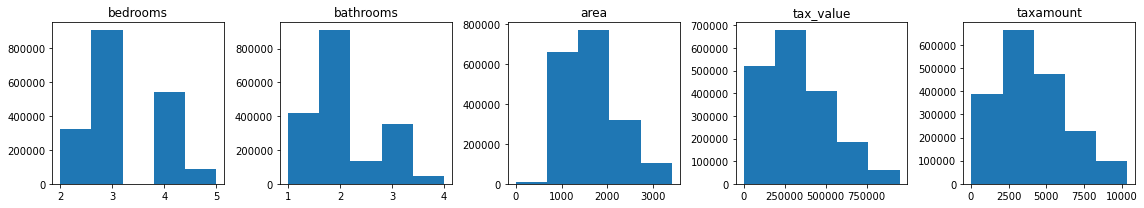

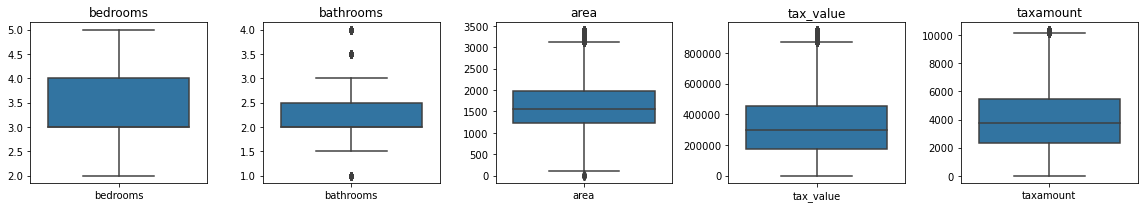

In [6]:
train, validate, test = wrangle.wrangle_zillow()

In [7]:
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

# 2 
Come up with some initial hypotheses based on your goal of predicting property value.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  object 
dtypes: float64(6), object(1)
memory usage: 63.4+ MB


“A hypothesis may be simply defined as a guess. A scientific hypothesis is an intelligent guess.” – Isaac Asimov

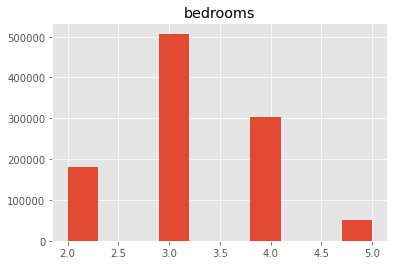

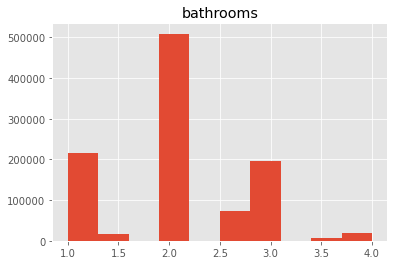

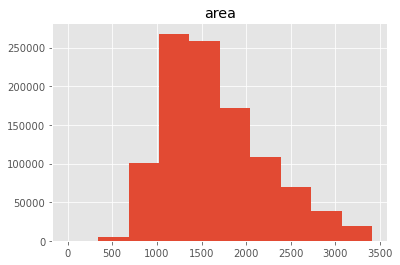

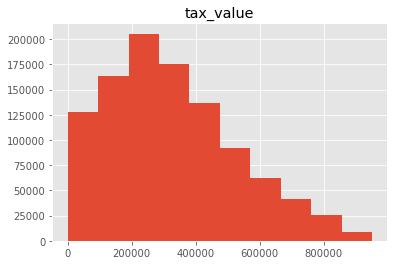

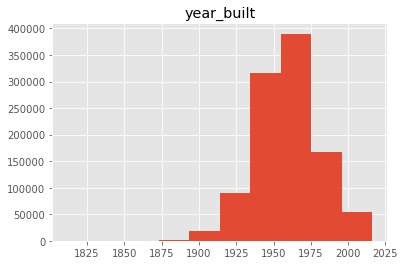

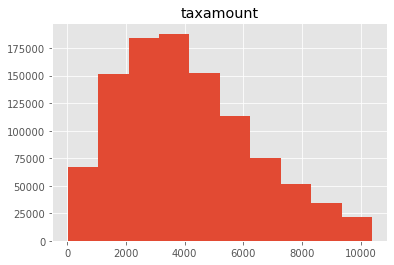

In [9]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.style.use('ggplot')
    plt.hist(train[col])
    plt.title(col)
    plt.show()

# 3
Visualize all combinations of variables in some way.

In [10]:
def plot_variable_pairs(df):
    g = sns.pairplot(train, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
    return g

In [11]:
plot_variable_pairs(temp_df_scaled)+

SyntaxError: invalid syntax (<ipython-input-11-300864fa7751>, line 1)

In [ ]:

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.